In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from wordcloud import WordCloud

In [18]:
# Loading movies dataset
df=pd.read_csv('/content/movies.csv')
df

<ipython-input-18-9ccff48bdacc>:2: DtypeWarning: Columns (1,2,3,4,6,7,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/movies.csv')


,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count
0,615656.0,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,02-08-2023,129000000.0,3.520565e+08,116.0,Released,Back for seconds.,7.079,1365.0
1,758323.0,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,05-04-2023,18000000.0,6.567582e+07,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0
2,533535.0,Deadpool & Wolverine,Action-Comedy-Science Fiction,en,A listless Wade Wilson toils away in civilian ...,5410.496,Marvel Studios-Maximum Effort-21 Laps Entertai...,24-07-2024,200000000.0,1.326387e+09,128.0,Released,Come together.,7.765,3749.0
3,667538.0,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,06-06-2023,200000000.0,4.070455e+08,127.0,Released,Unite or fall.,7.340,1007.0
4,693134.0,Dune: Part Two,Science Fiction-Adventure,en,Follow the mythic journey of Paul Atreides as ...,4742.163,Legendary Pictures,27-02-2024,190000000.0,6.838137e+08,167.0,Released,Long live the fighters.,8.300,2770.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
722313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
722314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
722315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Preprocessing the data

In [15]:
df.dropna(subset=["id"], inplace=True)
df

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count
0,615656.0,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,02-08-2023,129000000.0,3.520565e+08,116.0,Released,Back for seconds.,7.079,1365.0
1,758323.0,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,05-04-2023,18000000.0,6.567582e+07,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0
2,533535.0,Deadpool & Wolverine,Action-Comedy-Science Fiction,en,A listless Wade Wilson toils away in civilian ...,5410.496,Marvel Studios-Maximum Effort-21 Laps Entertai...,24-07-2024,200000000.0,1.326387e+09,128.0,Released,Come together.,7.765,3749.0
3,667538.0,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,06-06-2023,200000000.0,4.070455e+08,127.0,Released,Unite or fall.,7.340,1007.0
4,693134.0,Dune: Part Two,Science Fiction-Adventure,en,Follow the mythic journey of Paul Atreides as ...,4742.163,Legendary Pictures,27-02-2024,190000000.0,6.838137e+08,167.0,Released,Long live the fighters.,8.300,2770.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212918,868738.0,Cold Turkey,NaN,en,NaN,1.091,NaN,30-08-1925,0.0,0.000000e+00,0.0,Released,NaN,0.000,0.0
212919,615321.0,Danger Ahead,Drama-Crime,en,Produced by low-budget entrepreneur Phil Golds...,1.091,Phil Goldstone Productions,21-09-1923,0.0,0.000000e+00,0.0,Released,NaN,0.000,0.0
212920,601886.0,Chain of Circumstance,Drama,en,A childless couple adopts a baby girl but a cr...,1.091,Columbia Pictures,23-08-1951,0.0,0.000000e+00,68.0,Released,Judged unfit to be a mother!,0.000,0.0
212921,787914.0,Carl und Carla,NaN,de,NaN,1.091,NaN,01-04-1915,0.0,0.000000e+00,0.0,Released,NaN,0.000,0.0


In [6]:
df.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count
0,615656.0,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,02-08-2023,129000000.0,3.520565e+08,116.0,Released,Back for seconds.,7.079,1365.0
1,758323.0,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,05-04-2023,18000000.0,6.567582e+07,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0
2,533535.0,Deadpool & Wolverine,Action-Comedy-Science Fiction,en,A listless Wade Wilson toils away in civilian ...,5410.496,Marvel Studios-Maximum Effort-21 Laps Entertai...,24-07-2024,200000000.0,1.326387e+09,128.0,Released,Come together.,7.765,3749.0
3,667538.0,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,06-06-2023,200000000.0,4.070455e+08,127.0,Released,Unite or fall.,7.340,1007.0
4,693134.0,Dune: Part Two,Science Fiction-Adventure,en,Follow the mythic journey of Paul Atreides as ...,4742.163,Legendary Pictures,27-02-2024,190000000.0,6.838137e+08,167.0,Released,Long live the fighters.,8.300,2770.0


In [7]:
df.shape

(212923, 15)

In [8]:
df[df["genres"]=="Comedy"]

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count
56,862553.0,Bar Fight,Comedy,en,Nina and Allen split everything in their lives...,626.541,NaN,11-11-2022,0.0,0.0,84.0,Released,Time to settle the score one drink at a time.,7.3,18.0
57,920143.0,The Trip 6,Comedy,es,The last year High School excursion is the wal...,610.333,Caracol Televisión-Dago García Producciones,25-12-2021,0.0,0.0,97.0,Released,The excursion of 11,7.0,44.0
140,949218.0,S.O.S. Mamis: La película,Comedy,es,Trini's daughter is sad that her best friend i...,308.662,Tiki Pictures-BH5-Elefantec Global,18-03-2022,0.0,0.0,105.0,Released,NaN,5.9,9.0
212,949218.0,S.O.S. Mamis: La película,Comedy,es,Trini's daughter is sad that her best friend i...,230.012,Tiki Pictures-BH5-Elefantec Global,18-03-2022,0.0,0.0,105.0,Released,NaN,5.9,9.0
255,671318.0,¿Y cómo es él?,Comedy,es,Thomas is a meek man on the verge of a nervous...,195.977,Pantelion Films,07-04-2022,0.0,0.0,95.0,Released,NaN,7.5,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212897,800639.0,La chanson du maçon,Comedy,fr,Three eccentric old homosexual men encourage a...,1.091,NaN,17-06-2002,0.0,0.0,90.0,Released,NaN,0.0,0.0
212899,306835.0,Wenn eine Wienerin Walzer tanzt,Comedy,de,NaN,1.091,NaN,17-10-1951,0.0,0.0,0.0,Released,NaN,0.0,0.0
212902,888938.0,Ungkarlspappan,Comedy,sv,The old count Kristian Örnklo has four childre...,1.091,SF Studios,28-01-1935,0.0,0.0,100.0,Released,NaN,0.0,0.0
212909,297032.0,Die Dickköpfe,Comedy,de,NaN,1.091,Sat.1,20-10-2002,0.0,0.0,0.0,Released,NaN,0.0,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212923 entries, 0 to 212922
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    212923 non-null  float64
 1   title                 212923 non-null  object 
 2   genres                193161 non-null  object 
 3   original_language     212923 non-null  object 
 4   overview              198505 non-null  object 
 5   popularity            212923 non-null  float64
 6   production_companies  149504 non-null  object 
 7   release_date          210731 non-null  object 
 8   budget                212923 non-null  float64
 9   revenue               212923 non-null  float64
 10  runtime               210521 non-null  float64
 11  status                212923 non-null  object 
 12  tagline               62216 non-null   object 
 13  vote_average          212923 non-null  float64
 14  vote_count            212923 non-null  float64
dtypes: fl

In [10]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_average,vote_count
count,212923.000000,212923.000000,2.129230e+05,2.129230e+05,210521.000000,212923.000000,212923.000000
mean,396911.853604,4.944091,1.309059e+06,3.368512e+06,79.789541,4.547747,95.146809
std,270561.924808,43.488076,1.021078e+07,3.727010e+07,159.345923,2.915813,726.045357
min,2.000000,1.091000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,158323.000000,1.400000,0.000000e+00,0.000000e+00,60.000000,1.500000,1.000000
50%,379170.000000,1.843000,0.000000e+00,0.000000e+00,89.000000,5.500000,4.000000
75%,596059.500000,3.555000,0.000000e+00,0.000000e+00,100.000000,6.609500,16.000000
max,968146.000000,8763.998000,5.000000e+08,2.920357e+09,51420.000000,10.000000,34857.000000


In [20]:
# Removing duplicates in data
df.drop_duplicates(['id'],keep = 'first', inplace = True)

In [12]:
df.shape

(189380, 15)

In [19]:
# Dealing with the missing values
df.isnull()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722312,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
722313,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
722314,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
722315,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [17]:
df.isnull().sum()

,0
id,0
title,0
genres,17297
original_language,0
overview,12961
popularity,0
production_companies,55196
release_date,1958
budget,0
revenue,0


In [21]:
df['genres']

,genres
0,Action-Science Fiction-Horror
1,Horror-Mystery-Thriller
2,Action-Comedy-Science Fiction
3,Action-Adventure-Science Fiction
4,Science Fiction-Adventure
...,...
212919,Drama-Crime
212920,Drama
212921,NaN
212922,Thriller-Drama


In [22]:
df['genres'].unique()

array(['Action-Science Fiction-Horror', 'Horror-Mystery-Thriller',
       'Action-Comedy-Science Fiction', ...,
       'Crime-Thriller-Comedy-Drama', 'Adventure-Comedy-Crime-Family',
       'Adventure-Action-Mystery'], dtype=object)

In [23]:
df['genres'].nunique()

8564

In [24]:
df['genres'] = df['genres'].apply(lambda x: 'NA' if pd.isna(x) or x == "" else x)
print(df['genres'].unique())

['Action-Science Fiction-Horror' 'Horror-Mystery-Thriller'
 'Action-Comedy-Science Fiction' ... 'Crime-Thriller-Comedy-Drama'
 'Adventure-Comedy-Crime-Family' 'Adventure-Action-Mystery']


In [25]:
df['production_companies'].unique()

array(['Apelles Entertainment-Warner Bros. Pictures-di Bonaventura Pictures-CMC Pictures-Gravity Pictures-China Film Group Corporation',
       'Screen Gems-2.0 Entertainment-Jesus & Mary-Worldwide Katz-Loyola Productions-FFILME.RO',
       'Marvel Studios-Maximum Effort-21 Laps Entertainment-20th Century Studios-Kevin Feige Productions-TSG Entertainment',
       ..., 'Studio Sixteen', 'Matray-Lubitsch-Film', 'Pen Films'],
      dtype=object)

In [26]:
df['production_companies'].nunique()

82959

In [27]:
df['release_date'].unique()

array(['02-08-2023', '05-04-2023', '24-07-2024', ..., '08-02-1932',
       '30-08-1925', '21-09-1923'], dtype=object)

In [28]:
df['release_date'].nunique()

31394

In [29]:
df['release_date'] = df['release_date'].fillna("Unknown")

In [30]:
df['release_date'].isnull().sum()

np.int64(0)

In [31]:
df['runtime'].nunique()

480

In [32]:
df['vote_average'].nunique()

3195

In [33]:
df['overview']

,overview
0,An exploratory dive into the deepest depths of...
1,Father Gabriele Amorth Chief Exorcist of the V...
2,A listless Wade Wilson toils away in civilian ...
3,When a new threat capable of destroying the en...
4,Follow the mythic journey of Paul Atreides as ...
...,...
212919,Produced by low-budget entrepreneur Phil Golds...
212920,A childless couple adopts a baby girl but a cr...
212921,NaN
212922,A physician whose wife was killed when two tra...


In [34]:
df[['budget', 'revenue', 'vote_count']].describe()

,budget,revenue,vote_count
count,1.893800e+05,1.893800e+05,189380.000000
mean,1.458395e+06,3.775282e+06,105.945332
std,1.080050e+07,3.947982e+07,769.125633
min,0.000000e+00,0.000000e+00,0.000000
25%,0.000000e+00,0.000000e+00,1.000000
50%,0.000000e+00,0.000000e+00,4.000000
75%,0.000000e+00,0.000000e+00,18.000000
max,5.000000e+08,2.920357e+09,34857.000000


In [35]:
df[['budget', 'revenue', 'vote_count']].describe().loc[['mean','max','min']]

,budget,revenue,vote_count
mean,1.458395e+06,3.775282e+06,105.945332
max,5.000000e+08,2.920357e+09,34857.000000
min,0.000000e+00,0.000000e+00,0.000000


In [36]:
df.shape

(189381, 15)

In [37]:
df['genres']

,genres
0,Action-Science Fiction-Horror
1,Horror-Mystery-Thriller
2,Action-Comedy-Science Fiction
3,Action-Adventure-Science Fiction
4,Science Fiction-Adventure
...,...
212919,Drama-Crime
212920,Drama
212921,NA
212922,Thriller-Drama


Exploratory Data Analysis

In [38]:
df['genres'].unique()

array(['Action-Science Fiction-Horror', 'Horror-Mystery-Thriller',
       'Action-Comedy-Science Fiction', ...,
       'Crime-Thriller-Comedy-Drama', 'Adventure-Comedy-Crime-Family',
       'Adventure-Action-Mystery'], dtype=object)

In [39]:
df['genres'].nunique()

8565

In [40]:
outlets = df['genres'].value_counts()
outlets

,count
genres,
Drama,22454
Documentary,17322
NA,17298
Comedy,15059
Horror,4711
...,...
Animation-Crime-Drama-Mystery-Action-Thriller,1
Comedy-Horror-Music-Science Fiction,1
Documentary-Horror-Mystery,1


In [41]:
frequently_used = outlets[outlets >= 2]
single  = outlets[outlets == 1]

In [42]:
frequently_used

,count
genres,
Drama,22454
Documentary,17322
NA,17298
Comedy,15059
Horror,4711
...,...
Animation-Science Fiction-Family-Comedy,2
Adventure-Family-Comedy-Action,2
Adventure-Action-Comedy-Western,2


In [43]:
frequently_used.shape

(3522,)

In [44]:
single.shape

(5043,)

In [45]:
print("total movies in our data = ", df.shape[0])

print("total movies that are part of frequently_used = ", df.shape[0] - single.shape[0])

print("percentage of movies that are part of frequently_used = ", np.round((df.shape[0] - single.shape[0]) / df.shape[0],2)*100, "%")


total movies in our data =  189381
total movies that are part of frequently_used =  184338
percentage of movies that are part of frequently_used =  97.0 %


In [47]:
frequently_used.head()

,count
genres,
Drama,22454
Documentary,17322
NA,17298
Comedy,15059
Horror,4711


In [48]:
frequently_used.head(10)

,count
genres,
Drama,22454
Documentary,17322
NA,17298
Comedy,15059
Horror,4711
Drama-Romance,4056
Comedy-Drama,3607
Animation,2982
Music,2799


In [49]:
top10_genres = df['genres'].value_counts()[:10].sort_values(ascending = True)
top10_genres

,count
genres,
Comedy-Romance,2498
Music,2799
Animation,2982
Comedy-Drama,3607
Drama-Romance,4056
Horror,4711
Comedy,15059
NA,17298
Documentary,17322


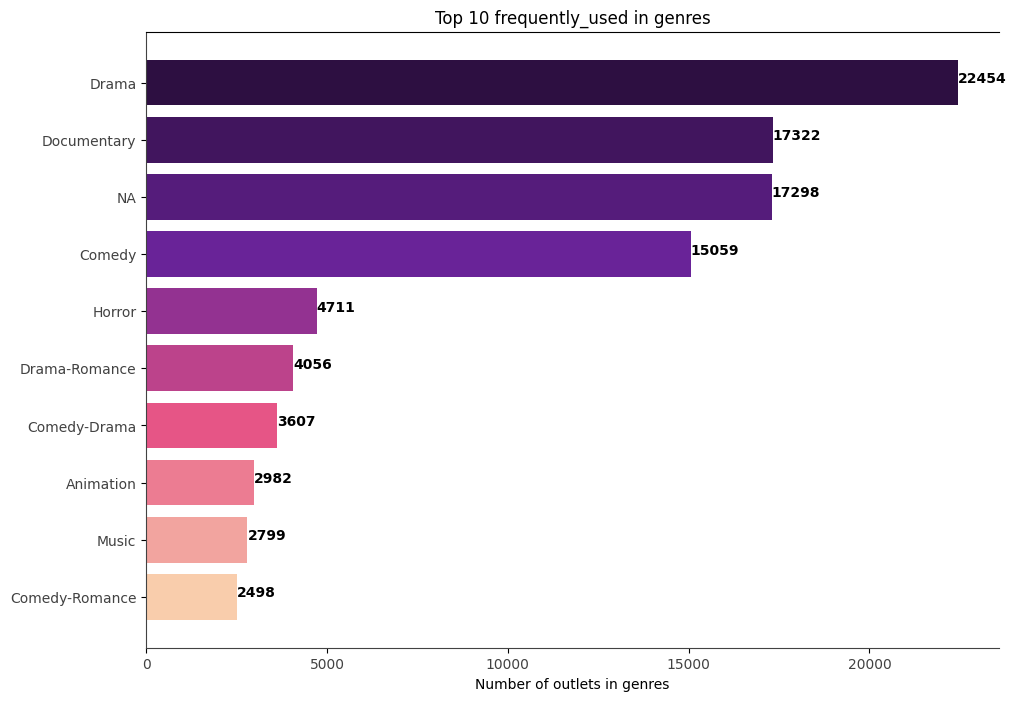

In [57]:
height = top10_genres.values
bars = top10_genres.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize = [11,8], frameon = False)
ax = fig.gca()
ax.spines['top'].set_visible("#424242")
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#424242")
ax.spines['bottom'].set_color("#424242")

colors = ['#f9cdac', '#f2a49f', '#ec7c92', '#e65586','#bc438b', '#933291','#692398','#551c7b','#41155e','#2d0f41']

plt.barh(y_pos, height, color = colors)

plt.xticks(color = "#424242")
plt.yticks(y_pos, bars, color = "#424242")
plt.xlabel("Number of outlets in genres")

for i, v in enumerate(height):
    plt.text(v + 3, i, str(v), color = 'black', fontweight = 'bold')
plt.title("Top 10 frequently_used in genres")
plt.show()

In [51]:
outlets = df['genres'].value_counts()
outlets

,count
genres,
Drama,22454
Documentary,17322
NA,17298
Comedy,15059
Horror,4711
...,...
Animation-Crime-Drama-Mystery-Action-Thriller,1
Comedy-Horror-Music-Science Fiction,1
Documentary-Horror-Mystery,1


In [52]:
Minimum_outlets = outlets[outlets > 4]
Minimum_outlets

,count
genres,
Drama,22454
Documentary,17322
NA,17298
Comedy,15059
Horror,4711
...,...
Action-Animation-Science Fiction-War,5
Animation-Action-Fantasy-Science Fiction,5
Romance-Thriller-Mystery,5


In [54]:
top10_frequently_used2 = df[df["genres"].isin(Minimum_outlets.index)].groupby("genres")["vote_average"].mean().sort_values(ascending=False)[:10].sort_values(ascending=True)
top10_frequently_used2

,vote_average
genres,
Music-TV Movie-Documentary,7.575500
Animation-Fantasy-Mystery,7.633333
Drama-TV Movie-Mystery-Crime,7.660000
Animation-Comedy-Family-Mystery,7.672357
Mystery-Documentary,7.740000
Animation-Action-Fantasy-Adventure,7.770000
Documentary-Action-Drama,7.853571
Documentary-History-Drama,8.000000
Mystery-TV Movie-Crime-Adventure,8.133333


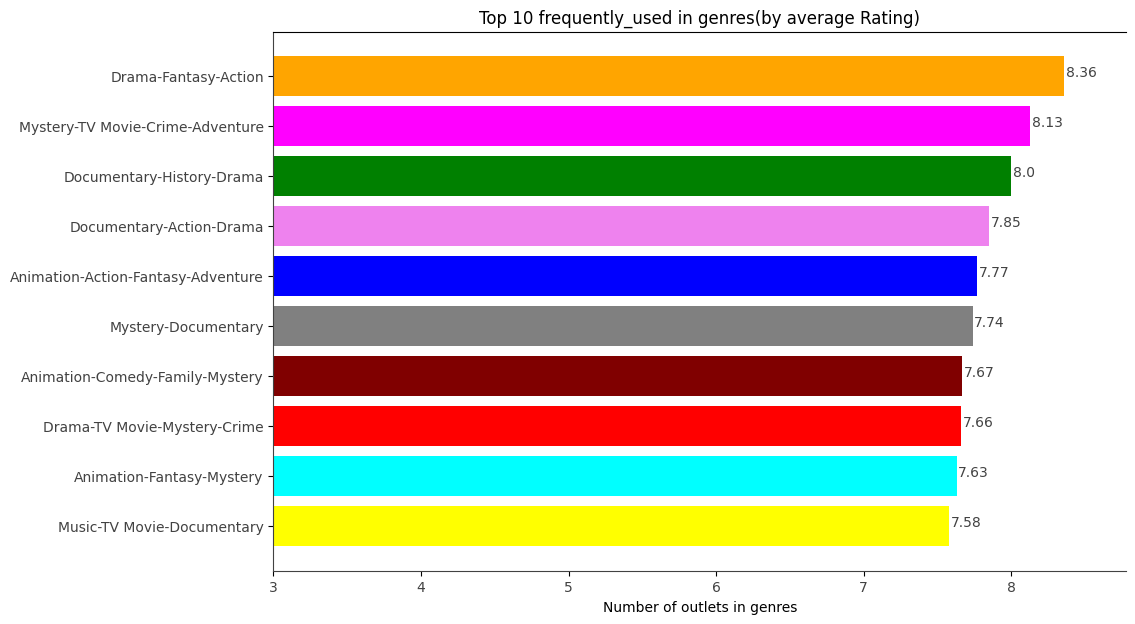

In [58]:
height = pd.Series(top10_frequently_used2.values).map(lambda x : np.round(x, 2))
bars = top10_frequently_used2.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
random.shuffle(colors)

#colors = ['#fded86', '#fce36b', '#f7c65d', '#f1a84f', '#ec8c41', '#e76f34', '#e25328', '#b04829', '#7e3e2b', '#4c3430']
plt.barh(y_pos, height, color=colors)

plt.xlim(3)
plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of outlets in genres")

for i, v in enumerate(height):
    ax.text(v + 0.01, i, str(v), color='#424242')
plt.title("Top 10 frequently_used in genres(by average Rating)")


plt.show()

In [59]:
df['production_companies']

,production_companies
0,Apelles Entertainment-Warner Bros. Pictures-di...
1,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...
2,Marvel Studios-Maximum Effort-21 Laps Entertai...
3,Skydance-Paramount-di Bonaventura Pictures-Bay...
4,Legendary Pictures
...,...
212919,Phil Goldstone Productions
212920,Columbia Pictures
212921,NaN
212922,Pen Films


In [60]:
df['production_companies'].value_counts()

,count
production_companies,
Metro-Goldwyn-Mayer,1044
Warner Bros. Pictures,935
Paramount,789
Columbia Pictures,730
BBC,692
...,...
Brutal Media-Filmax-TV3,1
Honky Tonk Freeway Company-Kendon Films-EMI Films-Universal Pictures-Associated Film Distribution,1
M.M.D. Rome,1


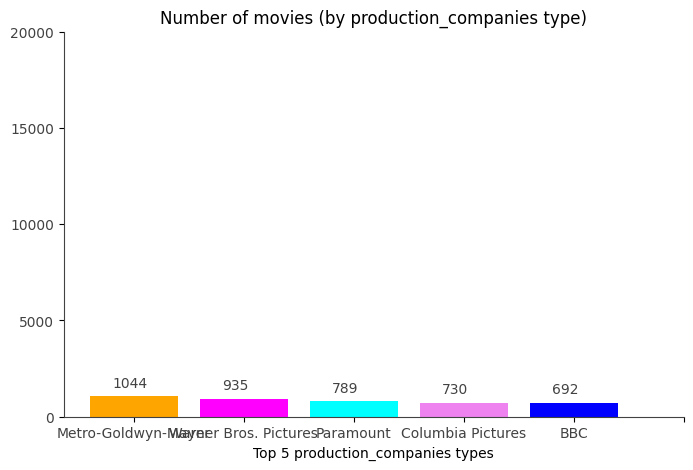

In [61]:
production_companies_count = df.groupby("production_companies").count()["id"].sort_values(ascending=False)[:5]

fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
random.shuffle(colors)
plt.bar(production_companies_count.index, production_companies_count.values, color=colors)

plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 25000, 5000), color="#424242")
plt.xlabel("Top 5 production_companies types")

for i, v in enumerate(production_companies_count):
    ax.text(i-0.2, v+500, str(v), color='#424242')
plt.title("Number of movies (by production_companies type)")


plt.show()

In [62]:
rating_production_companies= df.groupby("production_companies")["budget"].mean().sort_values(ascending=False)[:10]
rating_production_companies

,budget
production_companies,
Skalar Film,500000000.0
20th Century Studios-Lightstorm Entertainment,430000000.0
Walt Disney Pictures-Jerry Bruckheimer Films-Moving Picture Company,379000000.0
Paramount Pictures-Skydance Media-TC Productions,345500000.0
Universal Pictures-Original Film-One Race-Perfect Storm Entertainment,340000000.0
Paramount Pictures-Red Wagon Entertainment-Parkes+MacDonald Image Nation-Scott Free Productions,310000000.0
Jerry Bruckheimer Films-Second Mate Productions-Walt Disney Pictures,300000000.0
RatPac Entertainment-Cruel & Unusual Films-Atlas Entertainment-Warner Bros. Pictures-DC Films,300000000.0
Warner Bros. Pictures-Double Dream-The Disco Factory-DC Films,300000000.0


In [63]:
df.groupby("production_companies")["revenue"].mean().sort_values(ascending=False)[:10]

,revenue
production_companies,
Dune Entertainment-Lightstorm Entertainment-20th Century Fox-Ingenious Media,2.920357e+09
Paramount-20th Century Fox-Lightstorm Entertainment,2.187464e+09
Marvel Studios-Pascal Pictures-Columbia Pictures,1.921847e+09
Walt Disney Pictures-Fairview Entertainment,1.663075e+09
Lucasfilm Ltd.-Bad Robot,1.571184e+09
Skydance-Don Simpson/Jerry Bruckheimer Films-Paramount,1.488733e+09
LuckyChap Entertainment-Heyday Films-NB/GG Pictures-Mattel-Warner Bros. Pictures,1.445638e+09
Original Film-One Race-Universal Pictures,1.375703e+09
Universal Pictures-Illumination-Nintendo,1.362000e+09


In [64]:
df.groupby("production_companies")["vote_count"].mean().sort_values(ascending=False)[:10]

,vote_count
production_companies,
Legendary Pictures-Syncopy-Lynda Obst Productions,34857.0
Legendary Pictures-Syncopy-Warner Bros. Pictures,33262.0
DC Comics-Legendary Pictures-Syncopy-Isobel Griffiths-Warner Bros. Pictures,31145.0
20th Century Fox-The Donners' Company-Genre Films-Marvel Entertainment,30107.0
Fox 2000 Pictures-Regency Enterprises-The Linson Company-20th Century Fox-Taurus Film,29181.0
Dune Entertainment-Lightstorm Entertainment-20th Century Fox-Ingenious Media,28943.0
Miramax-A Band Apart-Jersey Films,27361.0
Village Roadshow Pictures-Groucho II Film Partnership-Silver Pictures-Warner Bros. Pictures,25380.0
Paramount-The Steve Tisch Company-Wendy Finerman Productions,24667.0


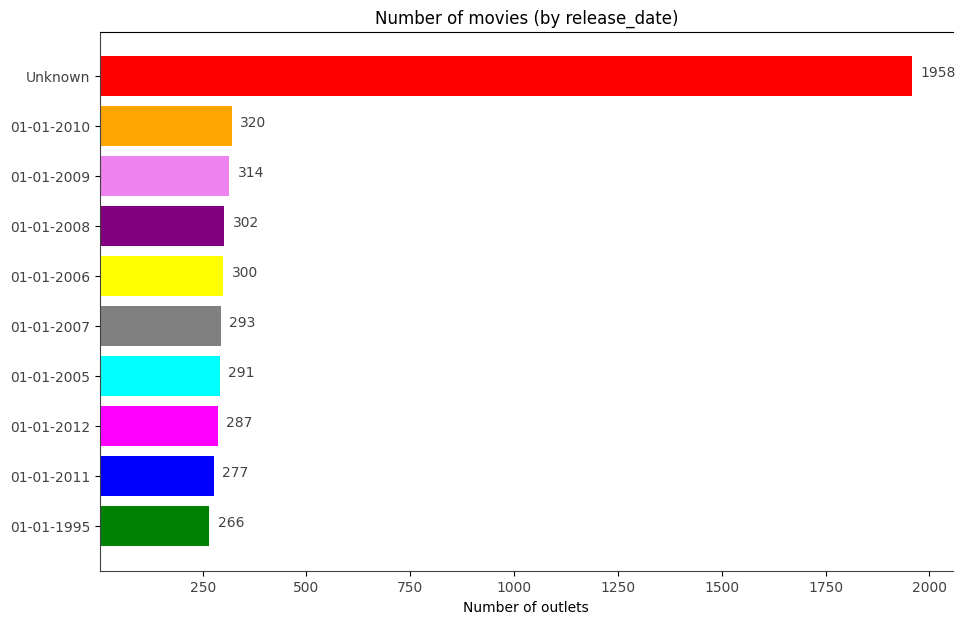

In [67]:
 release_date_movies= df.groupby("release_date").count()["id"].sort_values(ascending=True)[-10:]

height = pd.Series( release_date_movies.values)
bars =  release_date_movies.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)

#colors = ['#dcecc9', '#aadacc', '#78c6d0', '#48b3d3', '#3e94c0', '#3474ac', '#2a5599', '#203686', '#18216b', '#11174b']
plt.barh(y_pos, height, color=colors)

plt.xlim(3)
plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of outlets")

for i, v in enumerate(height):
    ax.text(v + 20, i, str(v), color='#424242')
plt.title("Number of movies (by release_date)")


plt.show()


In [68]:
df.groupby("release_date")["budget"].mean().sort_values(ascending=False)[:10]

,budget
release_date,
17-12-2025,400000000.0
21-05-2025,400000000.0
25-06-2023,294700000.0
08-07-2023,291000000.0
20-12-2028,250000000.0
16-12-2026,250000000.0
06-11-2024,250000000.0
24-07-2024,200000000.0
16-04-2025,155000000.0


In [69]:
df.groupby("release_date")["revenue"].mean().sort_values(ascending=False)[:10]

,revenue
release_date,
24-07-2024,1.326387e+09
15-12-2009,7.300893e+08
08-07-2023,5.675354e+08
19-07-2023,4.795277e+08
26-12-1973,4.414000e+08
03-05-2023,4.228000e+08
28-06-2007,3.904847e+08
25-06-2023,3.839000e+08
20-07-2023,3.729450e+08


In [70]:
df.groupby("release_date")["vote_count"].mean().sort_values(ascending=False)[:10]

,vote_count
release_date,
14-03-1972,20083.0
03-07-1985,10285.0
09-10-1993,8823.0
28-06-2007,8402.0
30-10-1995,8216.5
26-12-1973,7700.0
15-12-2009,7237.0
16-12-2002,7041.0
16-04-1988,6695.0


<ipython-input-74-a5a03eecd2d7>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['budget'], shade=True)


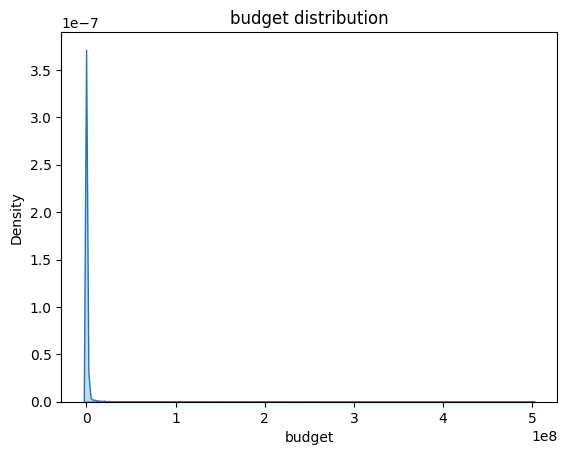

In [74]:
sns.kdeplot(df['budget'], shade=True)
plt.title("budget distribution")
plt.show()

<ipython-input-73-222708e0b5a8>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['vote_average'], shade=True)


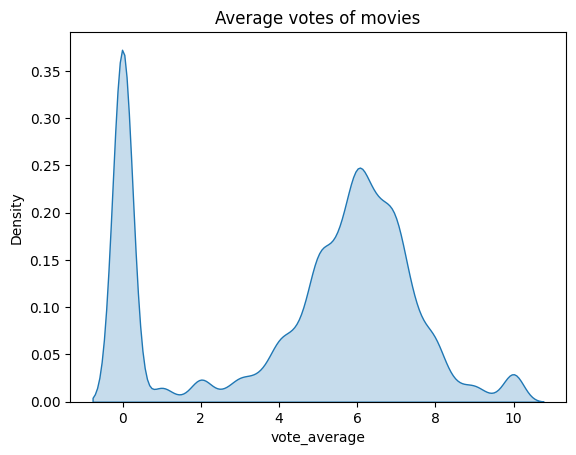

In [73]:
sns.kdeplot(df['vote_average'], shade=True)
plt.title("Average votes for movies")
plt.show()

<ipython-input-77-1ca4770c34e1>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['vote_average'], shade=True)


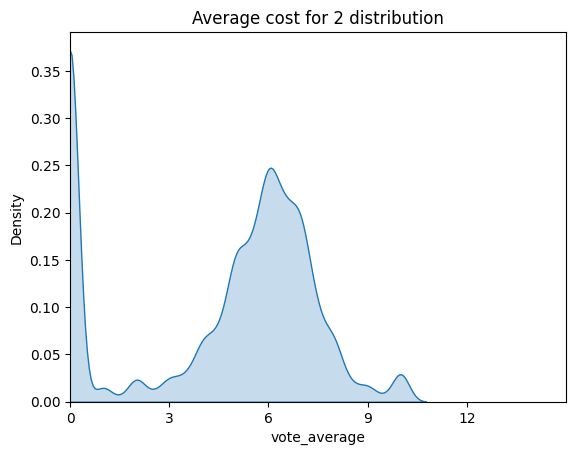

In [77]:
sns.kdeplot(df['vote_average'], shade=True)
plt.xlim([0, 15])
plt.xticks(range(0,15,3))
plt.title("Average votes for movies")
plt.show()

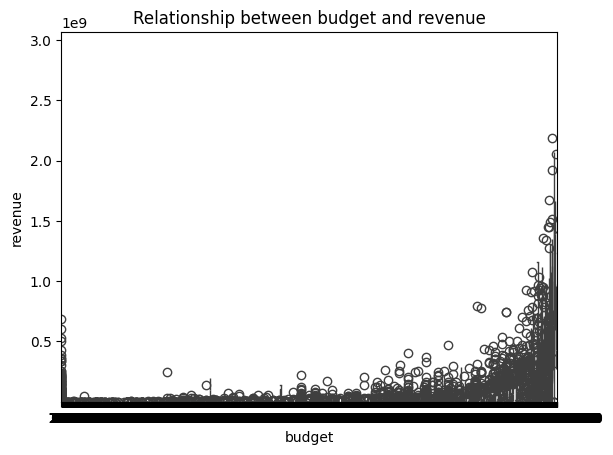

In [84]:
sns.boxplot(x='budget', y='revenue', data=df)
plt.ylim(1)
plt.title("Relationship between budget and revenue")
plt.show()